In [85]:
import numpy as np
import pandas as pd

In [86]:
df = pd.read_csv('flipkart_reviews_dataset.csv')

In [87]:
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Simply awesome,Writing this review after using this product f...,Dharwad,5 months ago,410,88
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Nice product,"👉Sound quality is excellent, Bass is awesome, ...",Varanasi,5 months ago,2397,610
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Simply awesome,Excellent product. Superb bass. Worth for mone...,Bengaluru,6 months ago,1615,439
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Simply awesome,Superb product actually I won’t prefer wireles...,Bengaluru,6 months ago,748,195
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Mind-blowing purchase,This is worth every penny you spend. I doesn't...,Ramanagara,6 months ago,681,194


In [88]:
#Creating a copy
process_reviews=df.copy()

#Checking for null values
process_reviews.isnull().sum()

product_id        0
product_title     0
rating            0
summary           0
review            0
location         77
date              0
upvotes           0
downvotes         0
dtype: int64

In [89]:
process_reviews['location']=process_reviews['location'].fillna('Missing')

## Concatenating review text and summary

In [90]:
process_reviews['reviews']=process_reviews['review']+process_reviews['summary']
process_reviews=process_reviews.drop(['review', 'summary'], axis=1)
process_reviews.head()

,product_id,product_title,rating,location,date,upvotes,downvotes,reviews
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,5 months ago,410,88,Writing this review after using this product f...
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,5 months ago,2397,610,"👉Sound quality is excellent, Bass is awesome, ..."
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,6 months ago,1615,439,Excellent product. Superb bass. Worth for mone...
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,6 months ago,748,195,Superb product actually I won’t prefer wireles...
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,6 months ago,681,194,This is worth every penny you spend. I doesn't...


## Creating 'sentiment' column

*This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment*

In [91]:
#Figuring out the distribution of categories
process_reviews['rating'].value_counts()

5    1316
1     464
4     415
3     161
2      84
Name: rating, dtype: int64

In [94]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['rating'] == 3.0:
        val = 'rating'
    elif row['rating'] == 1.0 or row['rating'] == 2.0:
        val = 'Negative'
    elif row['rating'] == 4.0 or row['rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [95]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

,product_id,product_title,rating,location,date,upvotes,downvotes,reviews,sentiment
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,5 months ago,410,88,Writing this review after using this product f...,Positive
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,5 months ago,2397,610,"👉Sound quality is excellent, Bass is awesome, ...",Positive
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,6 months ago,1615,439,Excellent product. Superb bass. Worth for mone...,Positive
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,6 months ago,748,195,Superb product actually I won’t prefer wireles...,Positive
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,6 months ago,681,194,This is worth every penny you spend. I doesn't...,Positive


In [96]:
process_reviews['sentiment'].value_counts()

Positive    1731
Negative     548
rating       161
Name: sentiment, dtype: int64

## Handling time column

In [98]:
# new data frame which has date and year
new = process_reviews["date"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

,product_id,product_title,rating,location,upvotes,downvotes,reviews,sentiment,year
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,410,88,Writing this review after using this product f...,Positive,None
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,2397,610,"👉Sound quality is excellent, Bass is awesome, ...",Positive,None
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,1615,439,Excellent product. Superb bass. Worth for mone...,Positive,None
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,748,195,Superb product actually I won’t prefer wireles...,Positive,None
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,681,194,This is worth every penny you spend. I doesn't...,Positive,None


In [104]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [105]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

,product_id,product_title,rating,location,upvotes,downvotes,reviews,sentiment,year
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,410,88,writing this review after using this product f...,Positive,None
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,2397,610,👉sound quality is excellent bass is awesome ba...,Positive,None
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,1615,439,excellent product superb bass worth for money ...,Positive,None
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,748,195,superb product actually i won’t prefer wireles...,Positive,None
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,681,194,this is worth every penny you spend i doesnt d...,Positive,None


# Review text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [106]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [107]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

,product_id,product_title,rating,location,upvotes,downvotes,reviews,sentiment,year
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,410,88,writing review using product two weeks u find ...,Positive,None
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,2397,610,👉sound quality excellent bass awesome balanced...,Positive,None
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,1615,439,excellent product superb bass worth money full...,Positive,None
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,748,195,superb product actually won’t prefer wireless ...,Positive,None
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,681,194,worth every penny spend doesnt disappoint way ...,Positive,None


In [108]:
pd.DataFrame(process_reviews.groupby('sentiment')['rating'].mean())

,rating
sentiment,
Negative,1.153285
Positive,4.760254
rating,3.000000


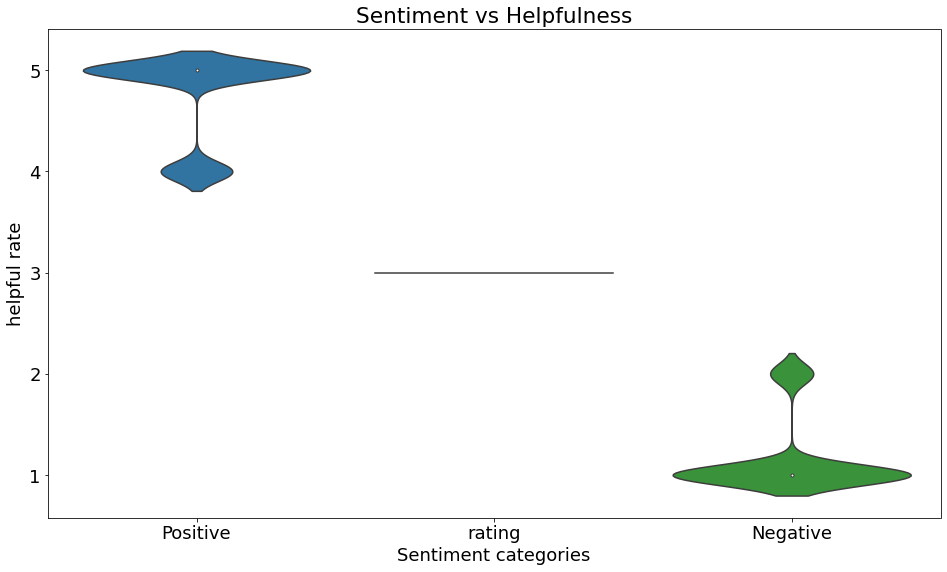

In [110]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'rating'])
senti_help = senti_help[senti_help['rating'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["rating"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

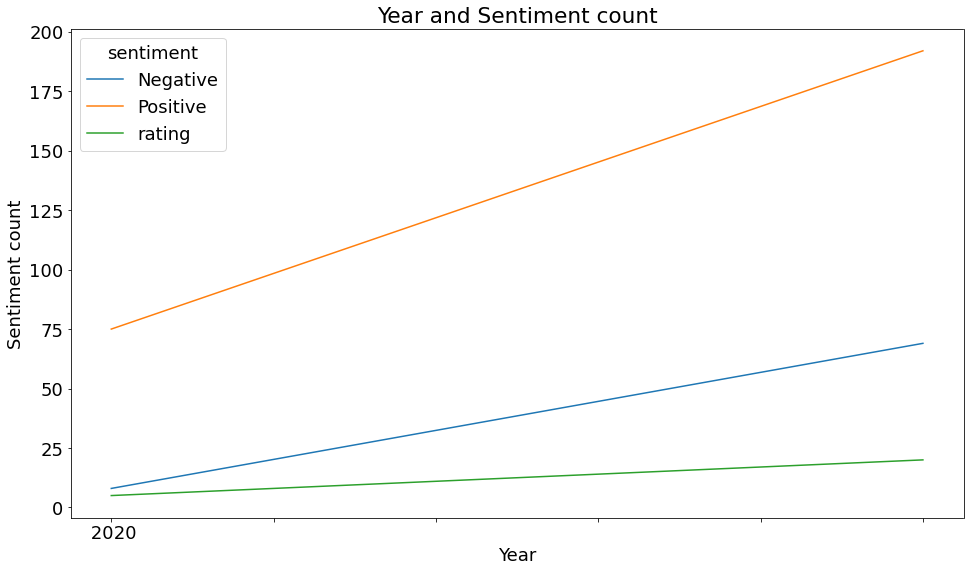

In [111]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [113]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [114]:
process_reviews.head()

,product_id,product_title,rating,location,upvotes,downvotes,reviews,sentiment,year,polarity,review_len,word_count
0,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Dharwad,410,88,writing review using product two weeks u find ...,Positive,None,0.239461,377,62
1,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",4,Varanasi,2397,610,👉sound quality excellent bass awesome balanced...,Positive,None,0.237500,362,47
2,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,1615,439,excellent product superb bass worth money full...,Positive,None,0.472222,95,13
3,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Bengaluru,748,195,superb product actually won’t prefer wireless ...,Positive,None,0.427500,131,21
4,ACCGC4GN5SQR7ZCZ,"OnePlus Bullets Wireless Z2 with Fast Charge, ...",5,Ramanagara,681,194,worth every penny spend doesnt disappoint way ...,Positive,None,0.208333,336,49


In [115]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


## Sentiment polarity distribution
Let's look at our polarity distribution

In [116]:


process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [117]:
process_reviews['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

## Review Text Length Distribution
Let's check out the length of review text

In [118]:


process_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

## Review Text Word Count Distribution
Let's check out the word count of review text

In [119]:


process_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [124]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [125]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

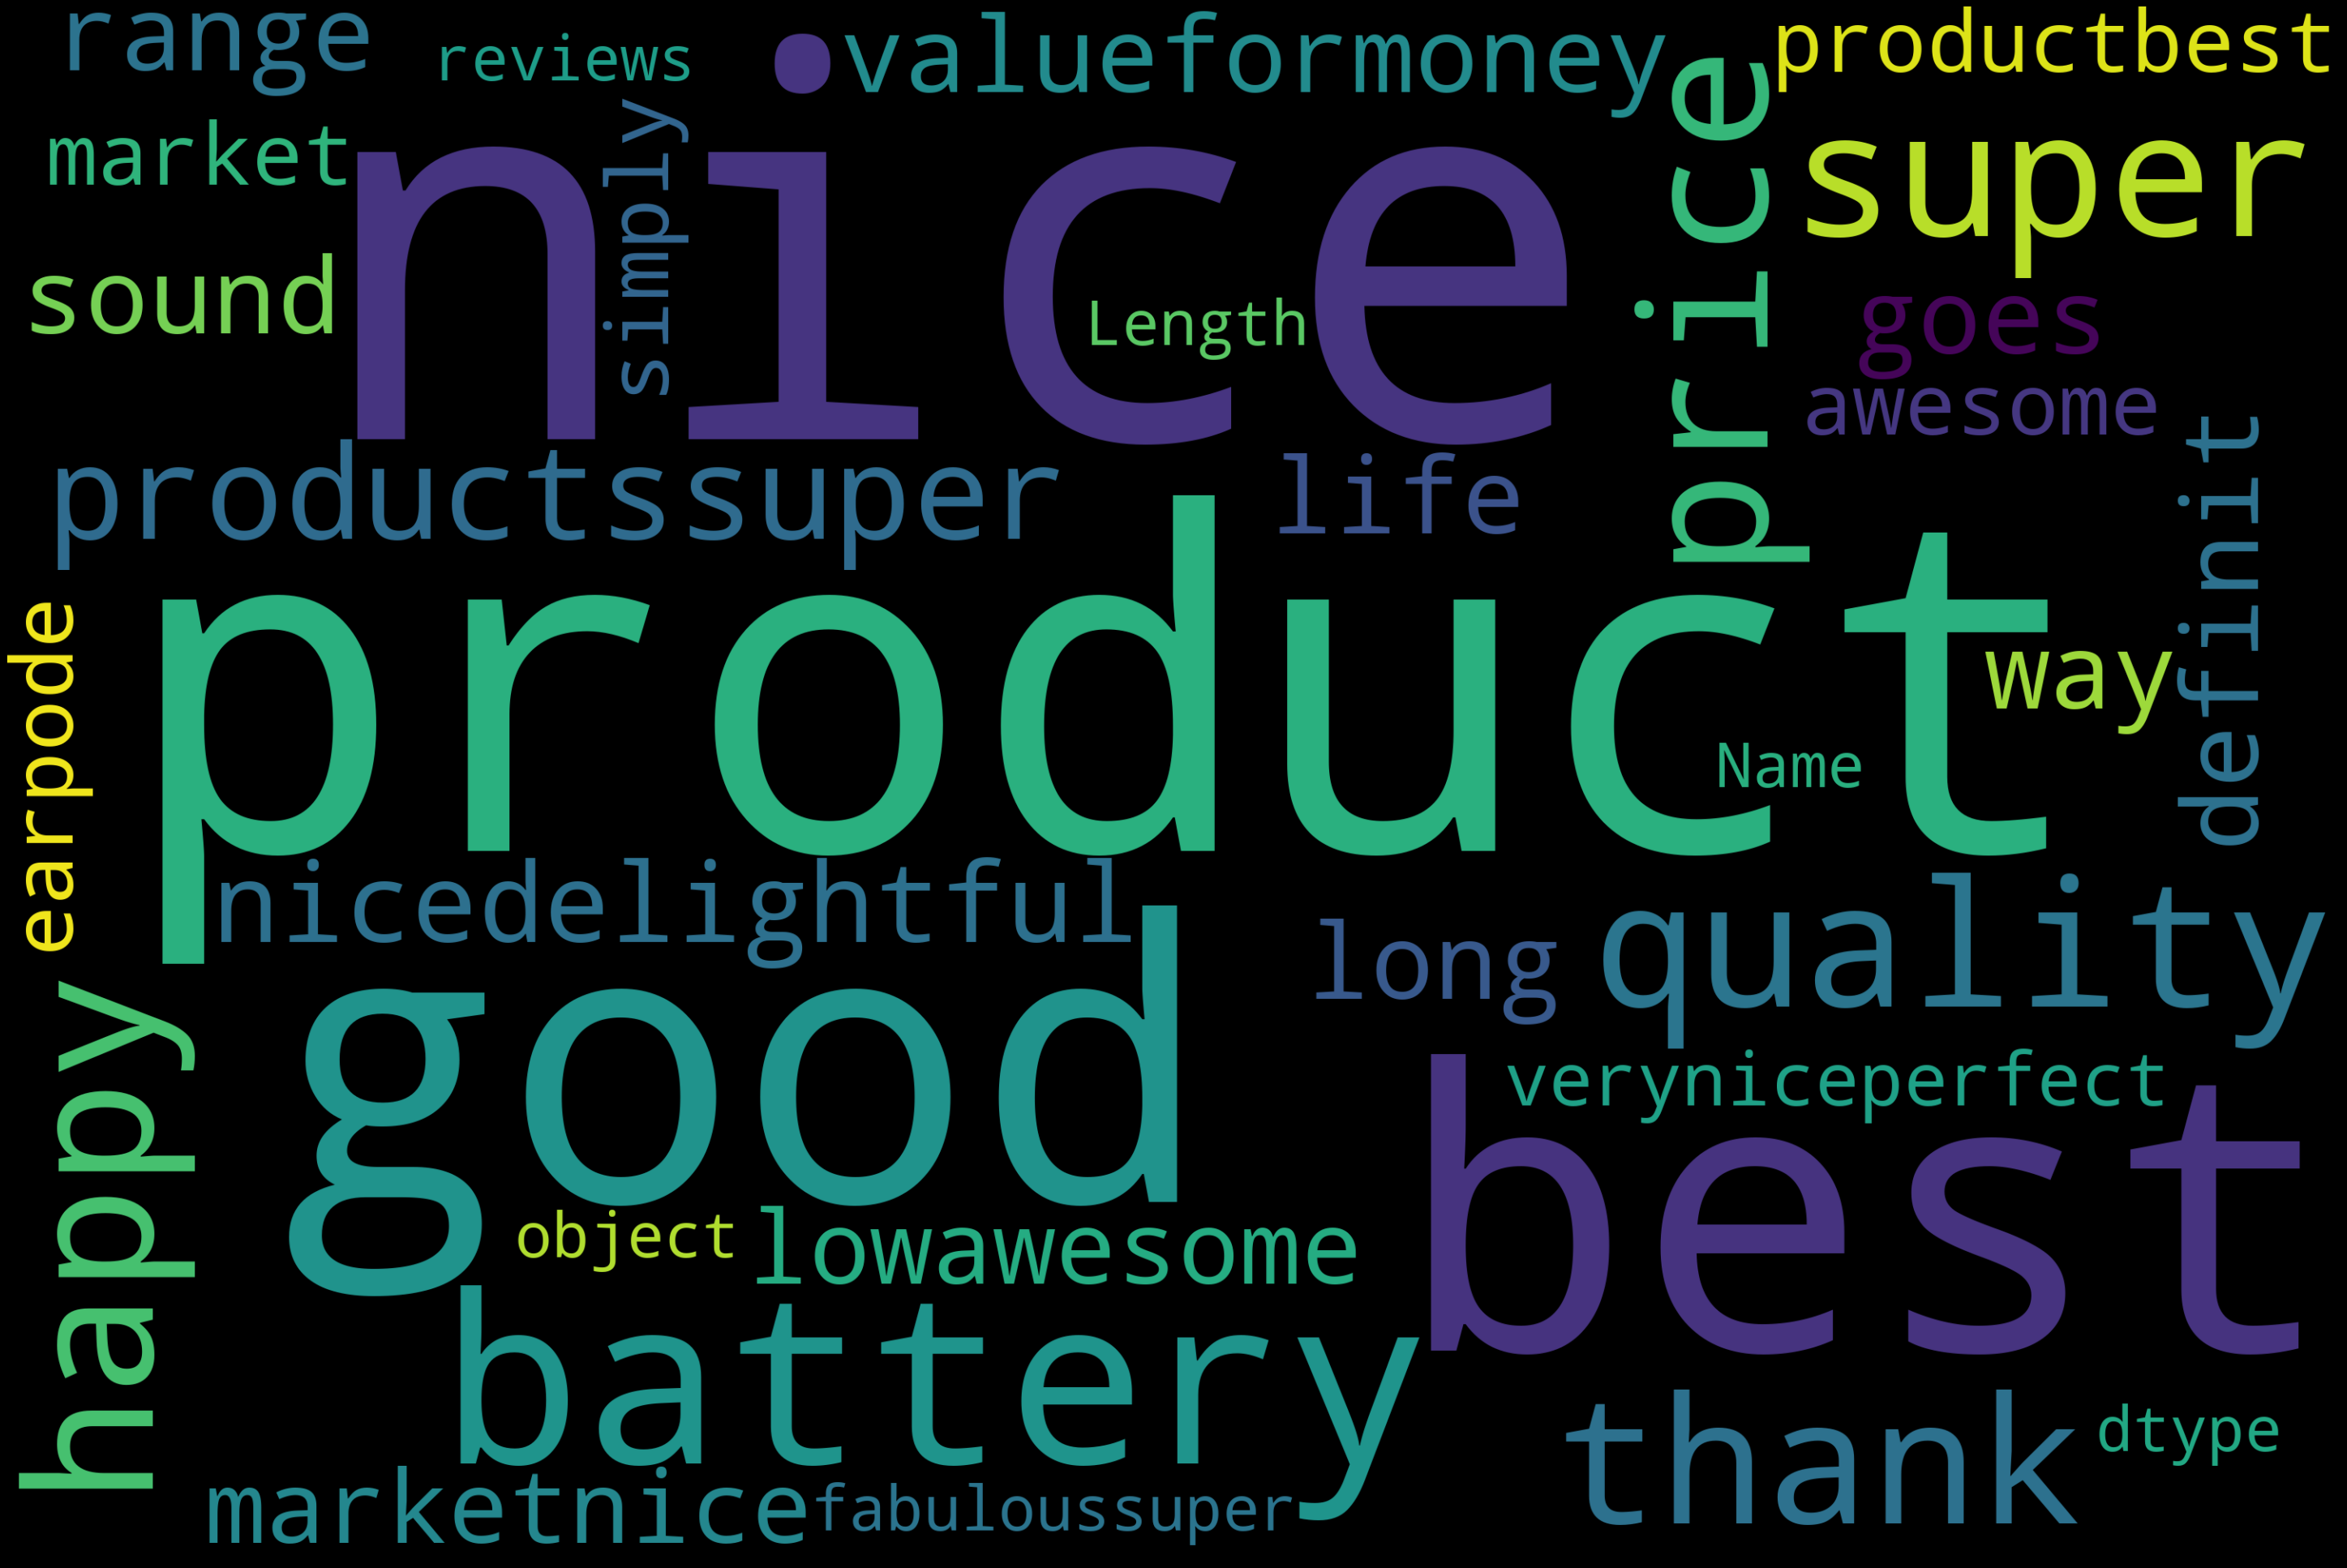

In [131]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

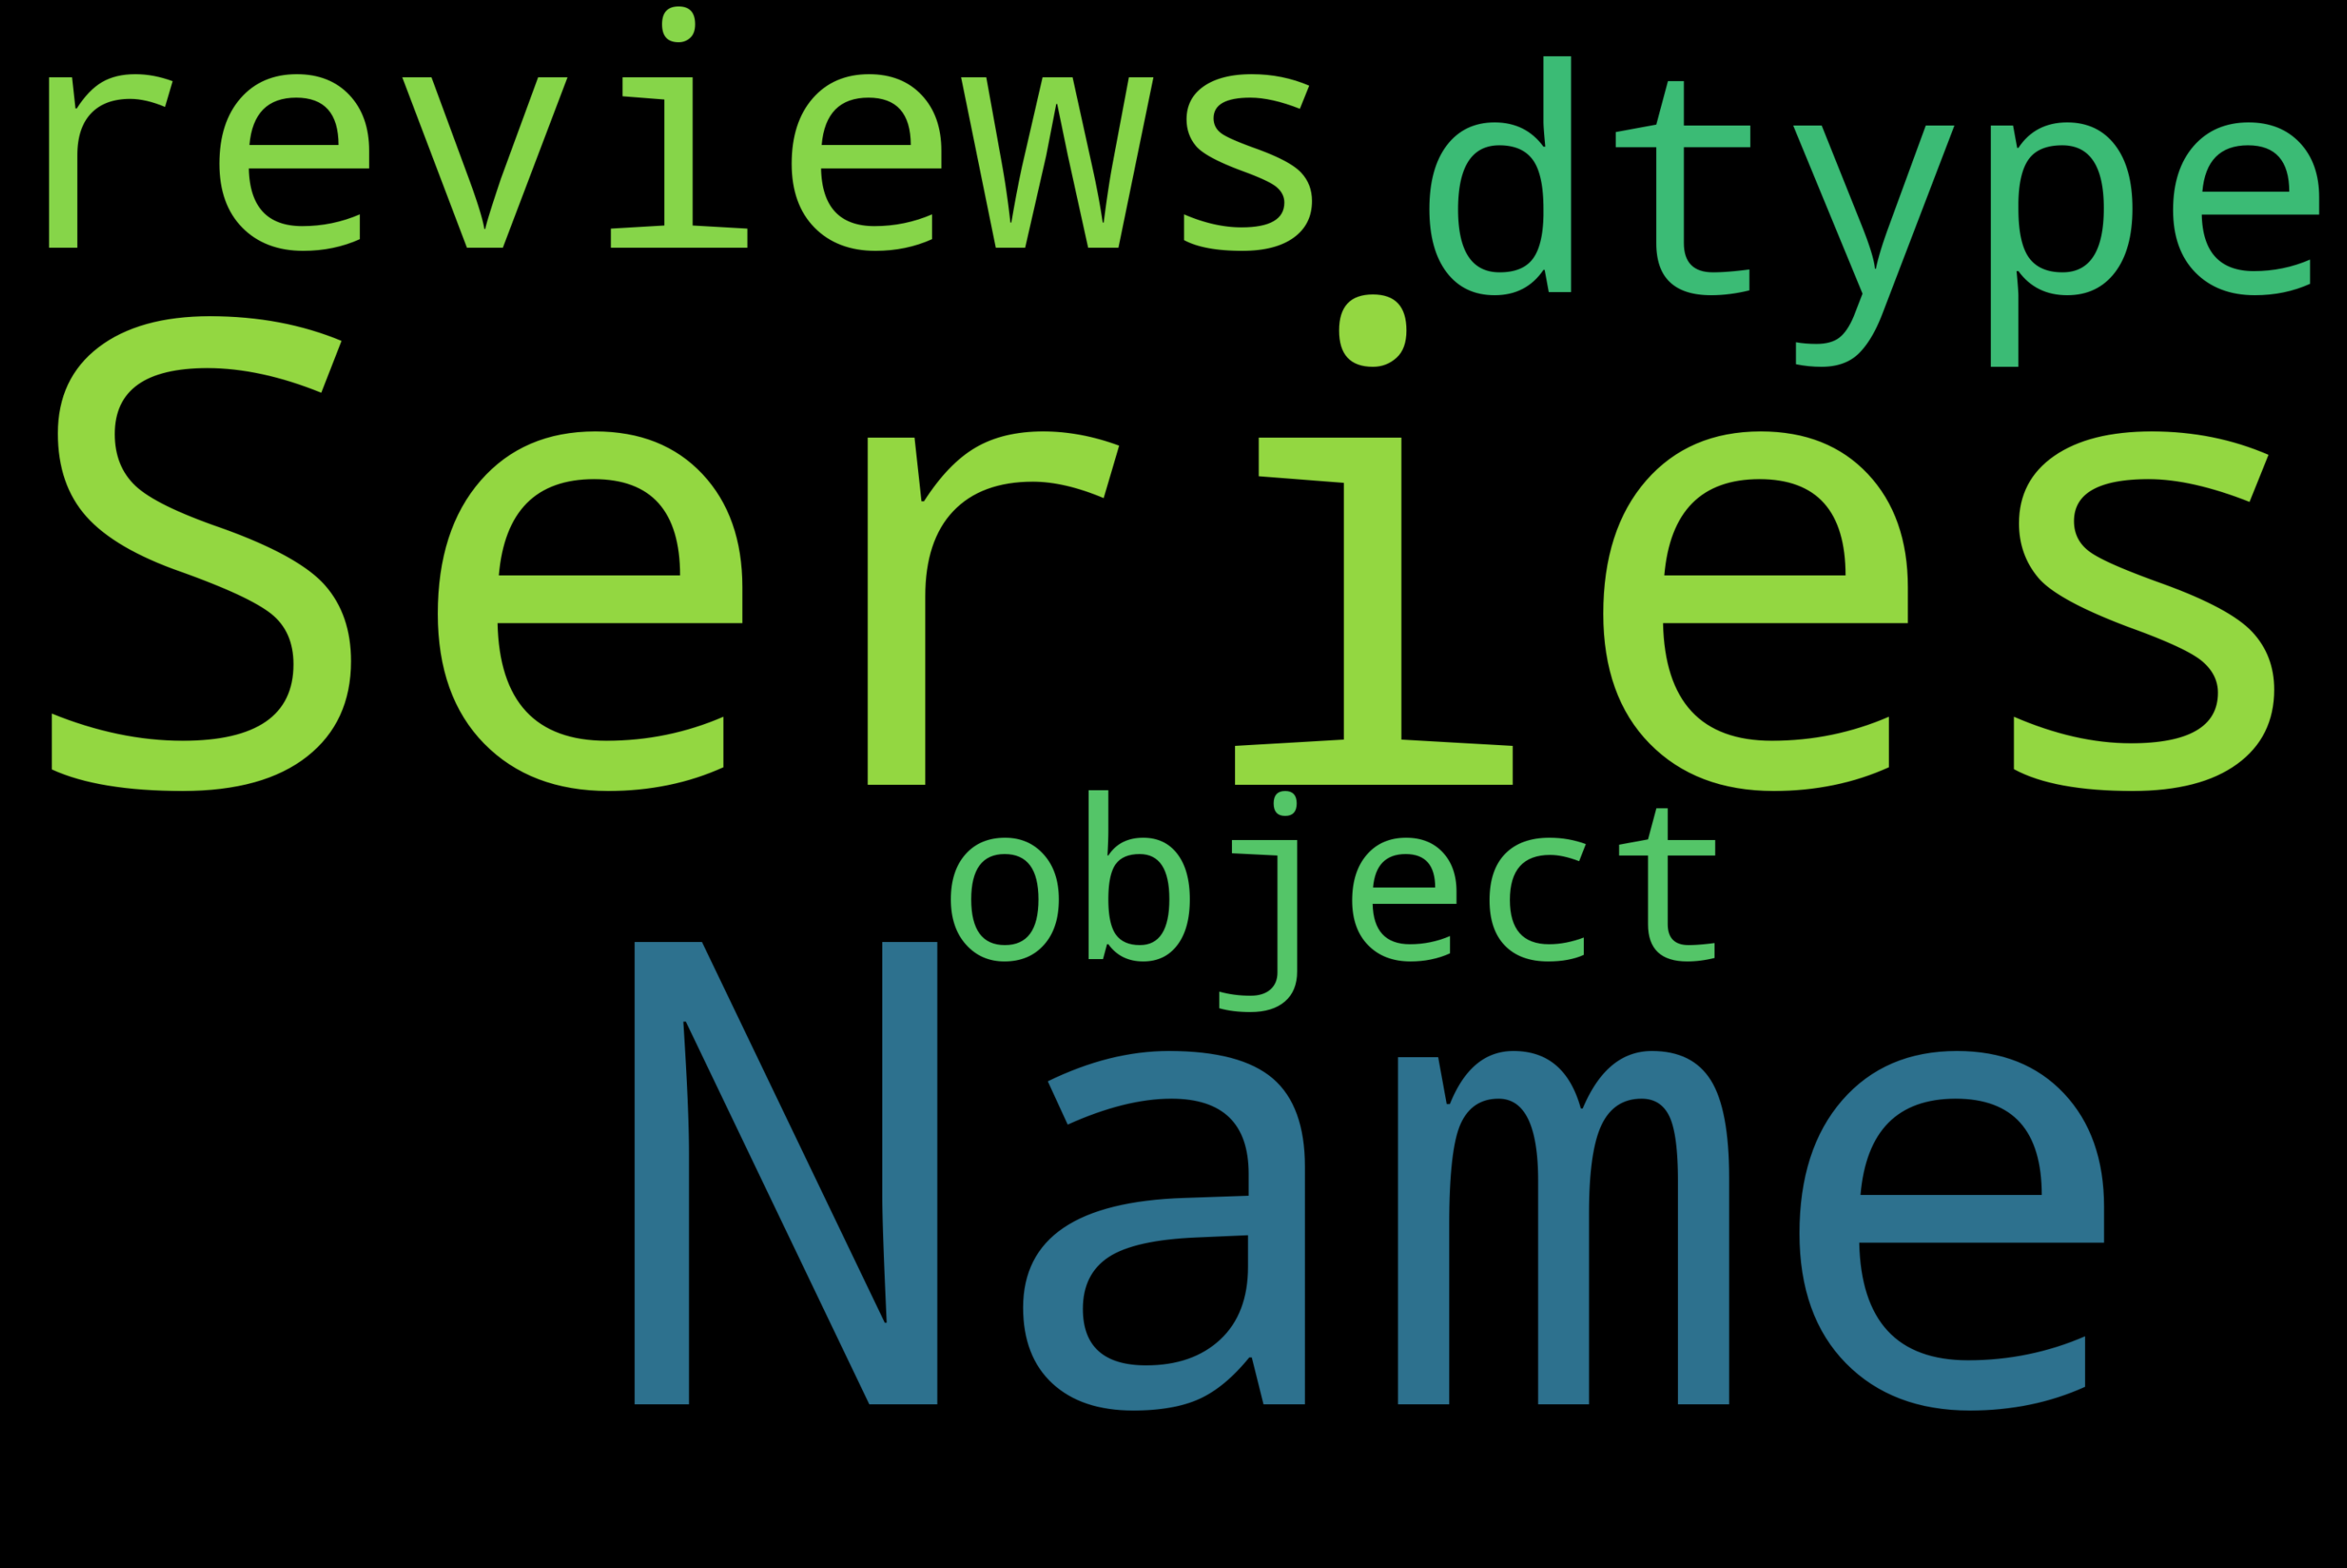

In [133]:
## Wordcloud-Neutral reviews
# Let's look at the word cloud of neutral reviews

text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

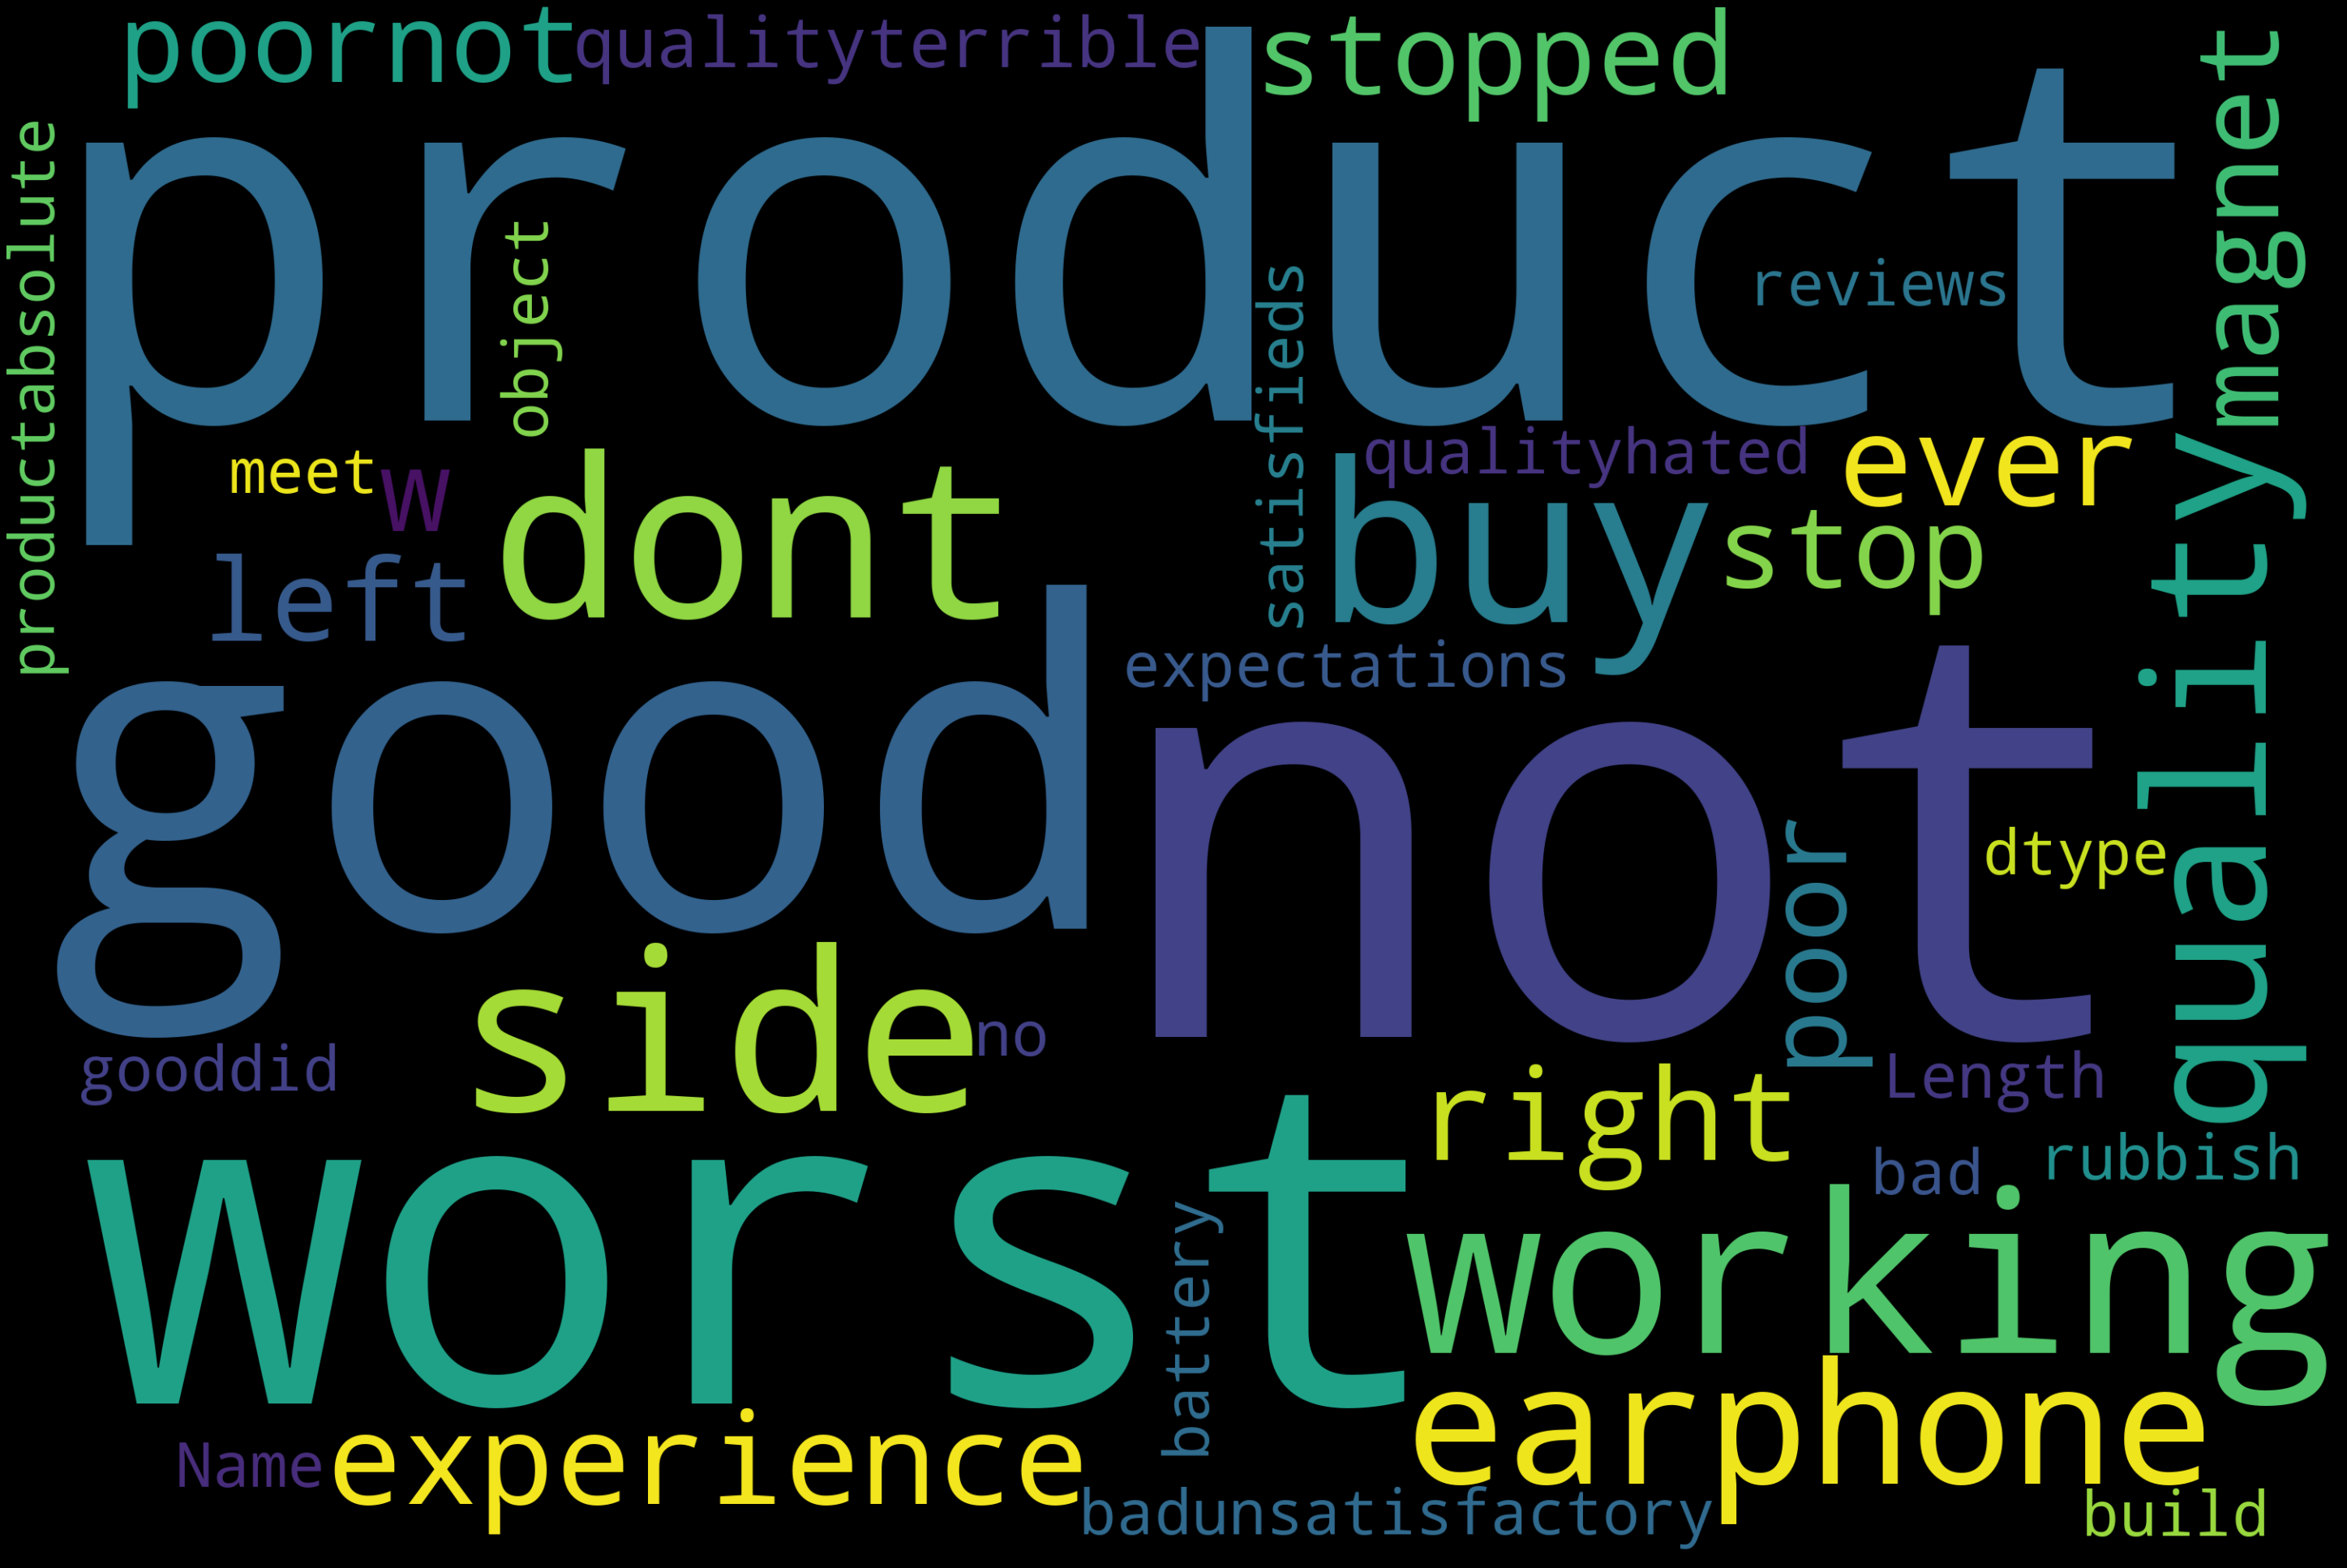

In [134]:
##Wordcloud-Negative reviews
## Let's look at the word cloud of negative reviews

text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [136]:

import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [137]:
##Encoding target variable-sentiment
##Let's encode our target variable with Label encoder.

# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([1, 2, 0])

In [138]:
process_reviews['sentiment'].value_counts()

1    1731
0     548
2     161
Name: sentiment, dtype: int64

In [139]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,writing review using product two weeks u find ...
1,👉sound quality excellent bass awesome balanced...
2,excellent product superb bass worth money full...
3,superb product actually won’t prefer wireless ...
4,worth every penny spend doesnt disappoint way ...


In [140]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)   

In [141]:
corpus[3]

'superb product actual won t prefer wireless headphon but love one base nice not much high vocal superb go itsimpli awesom'

In [142]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [143]:
X.shape

(2440, 5000)

In [144]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

In [145]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 1731, 0: 548, 2: 161})
Resampled dataset shape Counter({1: 1731, 2: 1731, 0: 1731})


In [146]:
##Train-test split(75:25)
##Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

## Model Building: Sentiment Analysis
As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [147]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [148]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.825
Decision Tree Test Accuracy: 0.8561475409836067
KNN Test Accuracy: 0.7270491803278689
SVC Test Accuracy: 0.8475409836065575
Naive Bayes Test Accuracy: 0.756967213114754


In [158]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)


In [159]:
#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [160]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [161]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

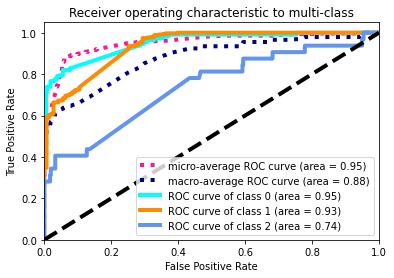

In [162]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
